What is the CIFAR-10 Dataset?
-> CIFAR-10 contains 60,000 color images (32*32 pixels) in 10 classes:
   . Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck.
Training set:50,000 images
Test set:10,000 images

In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


Each image is 32*32*3 (height*width*RGB channels)

In [3]:
#Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 20s 0us/step


Normalizing means scaling pixel values to [0,1] range for faster training.

In [4]:
#Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0


Conv2D(32,(3,3)) ->32 filters, 3*3 size, detects features
MaxPooling2D((2,2)) -> Downsamples by taking max value in 2*2 patch
Flatten() -> Converts 3D feature maps to 1D vector
Dense(64) -> Fully connected layer with 64 units
Dense(10) -> Output layer for 10 classes

In [5]:
#Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


Optimizer: Adam (adaptive learning rate)

Loss: SparseCategoricalCrossentropy (used for integer-labeled classification)

Metric: Accuracy

In [6]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
#Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.5264 - accuracy: 0.4448 - val_loss: 1.2629 - val_accuracy: 0.5425
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1554 - accuracy: 0.5903 - val_loss: 1.1810 - val_accuracy: 0.5857
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0055 - accuracy: 0.6482 - val_loss: 0.9847 - val_accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9135 - accuracy: 0.6810 - val_loss: 0.9738 - val_accuracy: 0.6611
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8411 - accuracy: 0.7050 - val_loss: 0.9482 - val_accuracy: 0.6750
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7903 - accuracy: 0.7234 - val_loss: 0.8676 - val_accuracy: 0.6990
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7415 - accuracy: 0.7405 - val_loss: 0.8607 -

In [8]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 2s - loss: 0.8912 - accuracy: 0.7046 - 2s/epoch - 7ms/step

Test accuracy: 0.70


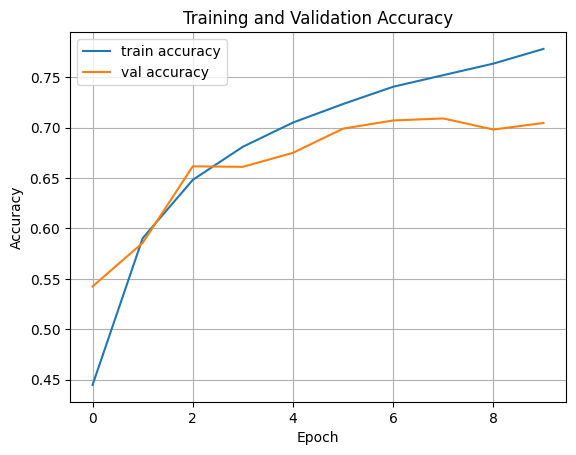

In [9]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title("Training and Validation Accuracy")
plt.show()


313/313 [==============================] - 2s 7ms/step


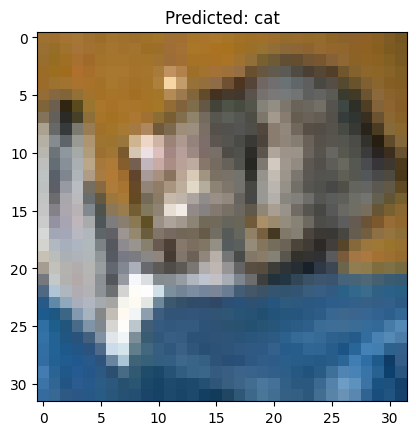

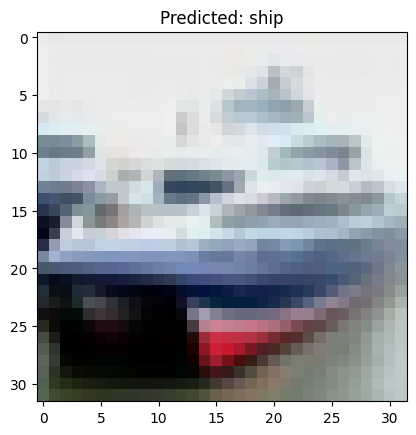

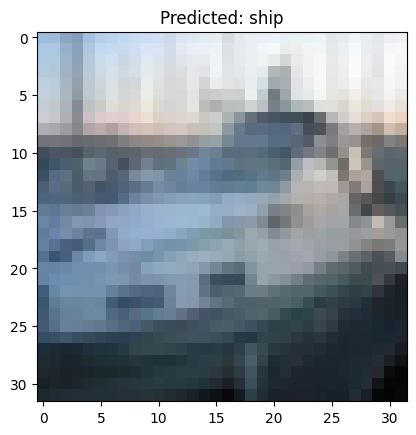

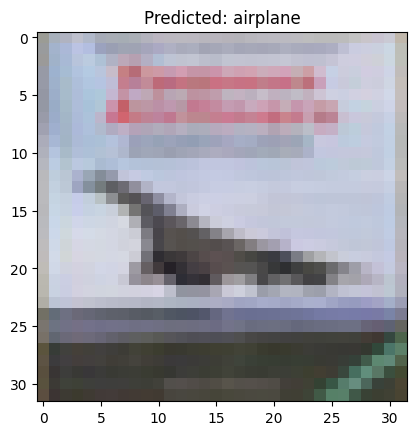

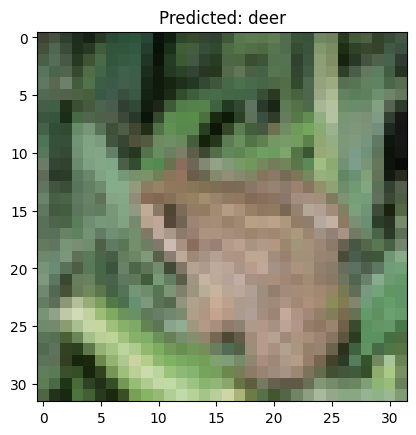

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# Display first 5 predictions
for i in range(5):
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[predictions[i].argmax()]}")
    plt.show()
